In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


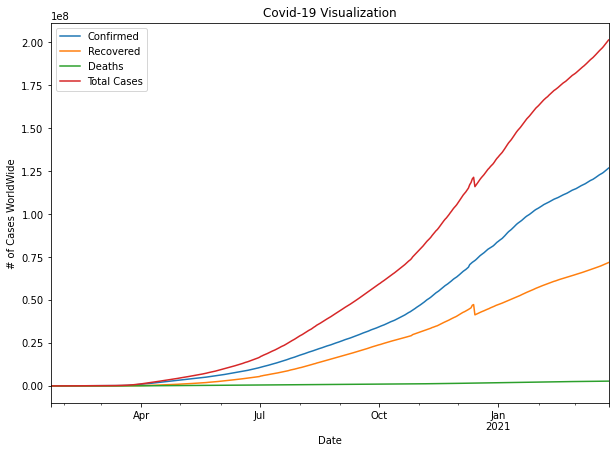

In [5]:
#Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w_chart = worldwide_df.plot(figsize=(10,7))
w_chart.set_xlabel('Date')
w_chart.set_ylabel('# of Cases WorldWide')
w_chart.title.set_text('Covid-19 Visualization')
plt.show()

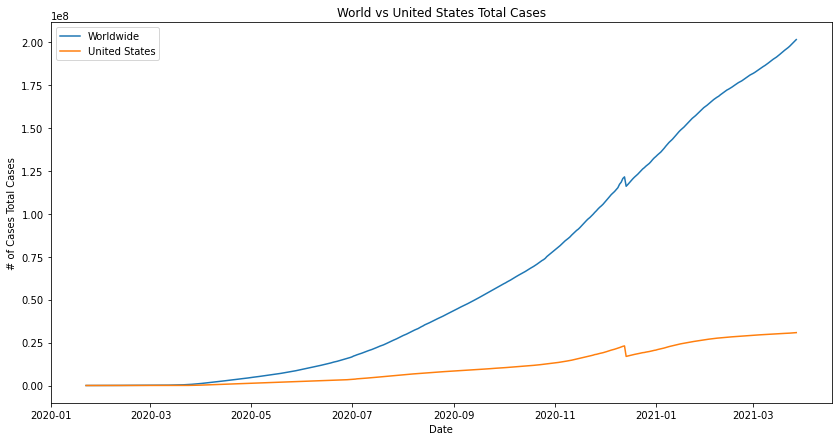

In [8]:
#United States vs. Worldwide Cases and Deaths
us_df = df[df['Country'] == 'US'].groupby(['Date']).sum()

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = "Worldwide")
ax.plot(us_df[['Total Cases']], label = "United States")

ax.set_xlabel('Date')
ax.set_ylabel('# of Cases Total Cases')
ax.title.set_text('World vs United States Total Cases')

plt.legend(loc = 'upper left')
plt.show()

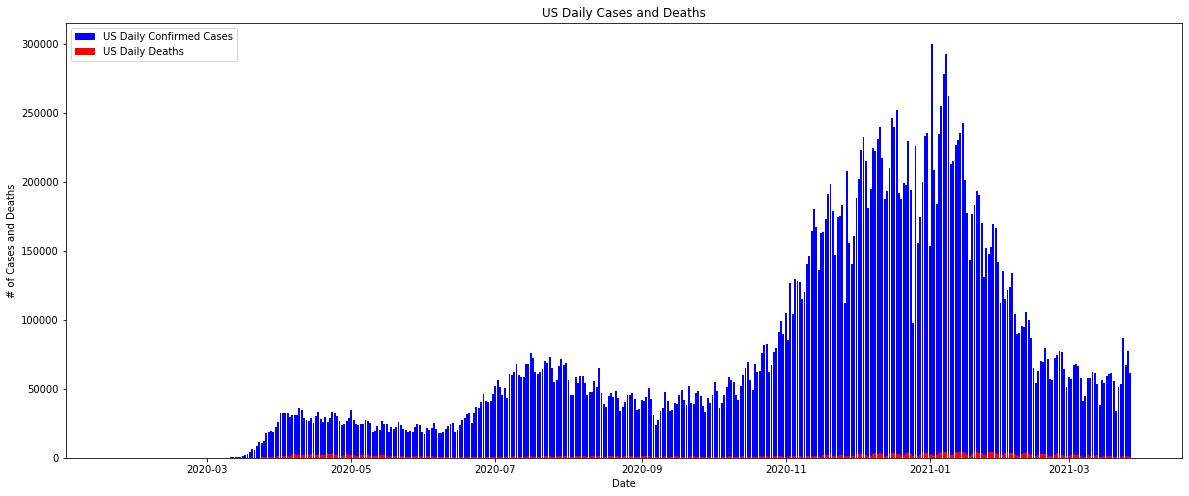

In [11]:
#Daily United States Cases and Deaths
us_df = us_df.reset_index()
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color='b', label='US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color='r', label='US Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of Cases and Deaths')

ax.title.set_text('US Daily Cases and Deaths')
plt.legend(loc='upper left')

plt.show()

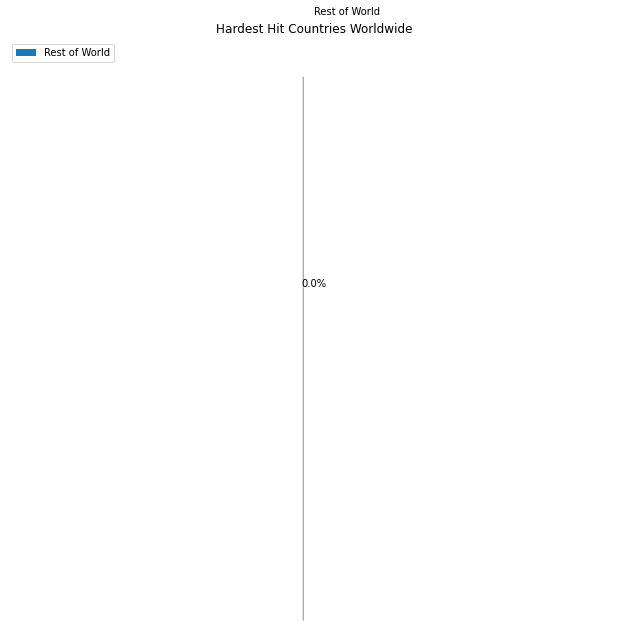

In [26]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top10.loc['Rest-of-World'] = today_df.sort_values(['Confirmed'], ascending=False)[:10].sum()
top10.loc['Rest-of-World', 'Country'] = "Rest of World"

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)

ax.pie(top10['Confirmed'], labels=top10['Country'], autopct='%1.1f%%', shadow=True, startangle=90, normalize=False)

ax.axis('equal')

ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')

plt.show()